# **Classification Analysis**


#### A. Implementation of Support Vector Machines (SVM) for classifying images of hand-written digits into their respective numerical classes (0 to 9).



**_Why SVM?_**

Support Vector Machines are powerful for classification problems, especially when dealing with high-dimensional data (like pixel data in images). SVM tries to find the best decision boundary (hyperplane) that separates the classes.


Dataset shape: (1797, 8, 8)
Number of samples: 1797
Number of features per sample: 64
Target labels (digits): {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


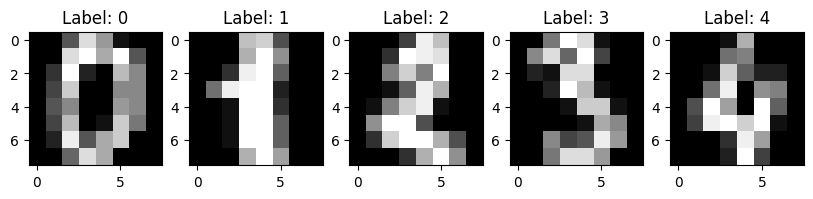

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()

# Inspect the dataset
print(f"Dataset shape: {digits.images.shape}")
print(f"Number of samples: {len(digits.images)}")
print(f"Number of features per sample: {digits.data.shape[1]}")
print(f"Target labels (digits): {set(digits.target)}")

# Display a few images with their labels
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Flatten the images for input to the SVM model
X = digits.data  # Shape: (1797, 64) - each sample has 64 pixel features
y = digits.target  # Shape: (1797,) - target labels (digits 0-9)

# Normalize the pixel values to a range of 0 to 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Check the shapes of the train and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (1347, 64)
Test set shape: (450, 64)


### Choosing the SVM Kernel
The SVM algorithm allows us to use different kernels for mapping non-linear relationships in data:

**Linear Kernel:** Used when the data is linearly separable.

**RBF (Radial Basis Function) Kernel:** Works well for non-linear data by adding a Gaussian transformation to the data points.

We'll experiment with both linear and RBF kernels and see which one performs better on this dataset.

**Why Start with Linear Kernel?**

Since our data has relatively high dimensionality (64 features), linear SVM can be a good first option. If we notice that the linear model is underperforming, we'll try a more flexible non-linear kernel.

---

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("\nLinear Kernel SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear) * 100:.2f}%")
print(classification_report(y_test, y_pred_linear))



Linear Kernel SVM Performance:
Accuracy: 97.78%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.96      0.96      0.96        46
           4       1.00      1.00      1.00        55
           5       0.97      0.97      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       1.00      0.95      0.97        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



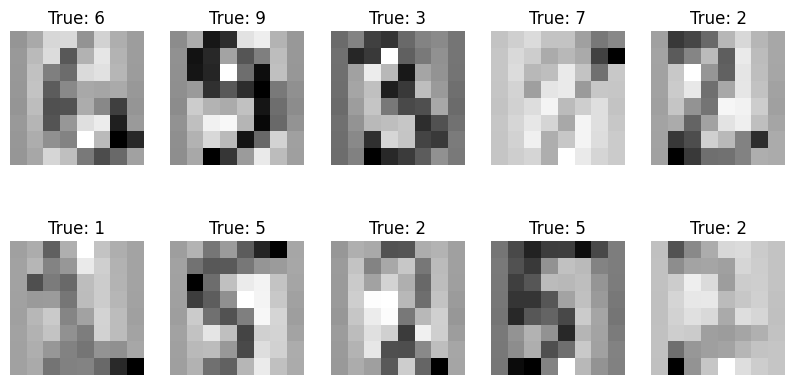

In [4]:
_, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.ravel(), X_test, y_test):
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set_title(f'True: {label}')
    ax.axis('off')
plt.show()

### **Conclusion:**

Linear SVM offers a strong, fast baseline performance that is close to 98%, which is excellent given that it operates in a lower-dimensional feature space without mapping to non-linear regions.

These results demonstrate the strength of SVM for image classification, and further improvements could be explored through techniques like feature extraction or dimensionality reduction (e.g., PCA), though the performance is already very strong.

## **B. Implement K-Nearest Neighbours’ algorithm on Social network ad dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.**
Dataset link:https://www.kaggle.com/datasets/rakeshrau/social-network-ads

### Step 1: Understanding the Problem

The goal is to use the Social Network Ads dataset to classify whether a user purchases a product based on their age and salary, using the K-Nearest Neighbors (KNN) algorithm. Our evaluation metrics will include the confusion matrix, accuracy, error rate, precision, and recall.

**Why KNN?**

KNN is a simple, non-parametric algorithm that classifies new data points based on similarity (distance) to its neighbors. It's ideal for this classification problem because we have relatively few features (age and salary), and we want to categorize users into one of two classes (Purchased: 0 or 1).

---

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [6]:
# Load dataset
dataset = pd.read_csv('./datasets/Social_Network_Ads.csv')

# View basic details
print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0



**Dataset Observations:**

_Features:_

1. `User ID`: Doesn't seem useful for prediction; we can ignore it as it's a unique identifier.
2. `Gender`: Might be interesting, but converting it into numerical form (0 for male, 1 for female) could be useful if we decide to include it.
3. `Age`: Definitely a key factor in predicting purchase behavior.
4. `EstimatedSalary`: Another key factor, as a higher salary could correlate with higher purchasing power.
5. `Purchased`: This is our target variable, where 1 indicates the person made a purchase and 0 indicates they didn't.



In [7]:
dataset = dataset.drop(columns=['User ID'])
print(dataset.describe())

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


In [8]:
dataset['Gender'] = LabelEncoder().fit_transform(dataset['Gender'])

X = dataset.iloc[:, :-1].values   
y = dataset.iloc[:, -1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
# Check the shapes to ensure proper split
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 300
Test set size: 100


In [10]:
# Create KNN classifier with K=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

### Step 9: Model Evaluation
We will evaluate the model using various metrics: confusion matrix, accuracy, error rate, precision, and recall.

---

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Accuracy, error rate, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[[58  5]
 [ 3 34]]

Accuracy: 92.00%
Error Rate: 8.00%
Precision: 0.87
Recall: 0.92


---

**Observations:**

- **Confusion Matrix:** Shows the number of True Positives, True Negatives, False Positives, and False Negatives.
- **Accuracy**: The percentage of correct predictions.
- **Error Rate:** The percentage of incorrect predictions.
- **Precision**: How many predicted positives are actually positive.
- **Recall**: How many actual positives were predicted correctly.

---